# Exploratory Data Analysis Workshop

June 24, 2020  

#### Welcome/Purpose of Workshop
- improve skills
- join our project team

#### About Data Circles


#### About Speakers

## 1. Introduction to the project

Until driverless vehicles become the norm, traffic collisions will continue to be a problem. According to the [Washington State Dept. of Transportation (WSDOT)](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf), in 2015, Washington had:  

• 5,576,586 Licensed Drivers  
• 6,252,554 Registered Vehicles  
• 59.7 billion Vehicle Miles traveled  
• 416,699 Speeding citations filed with Washington State Courts  
• 33,697 Cell phone and texting citations filed with Washington State Courts  
• 26,363 DUI cases filed with Washington State Courts  
• 117,053 Total collisions  
    $\,\,\,\,\,\,$ • Fridays had the most collisions 
    $\,\,\,\,\,\,$ • Sundays had the fewest collisions 
    $\,\,\,\,\,\,$ • Rush hour had the most collisions, with the highest number during 5:00 p.m. - 5:59 p.m.  
    $\,\,\,\,\,\,$ • The middle of the night had the fewest crashes, with the least number during 3:00 a.m. - 3:59 a.m.  
    $\,\,\,\,\,\,$ • December had the most crashes (on average, 401 per day)  
    $\,\,\,\,\,\,$ • February had the fewest crashes (271 per day)  
    $\,\,\,\,\,\,$ • Driver inattention or distraction was the most frequent contributing factor     

Source: CLAS (WSDOT), FARS (WTSC), DOL and AOC  

So, by analyzing crash data we hope to identify the most dangerous sections of road in Seattle and suggest improvements.  

If you are interested in joining the project team, please signup at datacircles.com {whatever the address is ???????}.  

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore') 

from datetime import datetime
from IPython.display import display, Markdown

## 4. Read the data into a dataframe

In [2]:
url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

df = pd.read_csv(url, parse_dates=['INCDTTM'])
display(df.head())

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.301317,47.545344,1,24100,24100,1788069,Matched,Block,NaN,S EDDY ST BETWEEN 24TH AVE S AND BEACON WR AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,3,0,0,3,0,0,0,2004/03/22 00:00:00+00,2004-03-22 06:43:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Clear,Dry,Daylight,NaN,4082010.0,NaN,32,One parked--one moving,0,0,N
1,-122.312515,47.548167,2,322338,323838,3815050,Matched,Intersection,33383.0,CORGIAT DR S AND S ALBRO PL,,NaN,2,Injury Collision,Angles,2,0,0,2,1,0,0,2019/08/09 00:00:00+00,2019-08-09 18:58:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.348195,47.723218,3,32200,32200,1079610,Matched,Intersection,35826.0,LINDEN AVE N AND N 130TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/08/30 00:00:00+00,2004-08-30 13:33:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,0,Clear,Dry,Daylight,NaN,4243021.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.385577,47.552091,4,59600,59600,2613682,Matched,Intersection,32804.0,42ND AVE SW AND SW FINDLAY ST,NaN,NaN,1,Property Damage Only Collision,Angles,6,0,0,2,0,0,0,2006/08/19 00:00:00+00,2006-08-19 12:09:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Dry,Daylight,NaN,6231020.0,NaN,10,Entering at angle,0,0,N
4,-122.310830,47.663075,5,328034,329534,EA05682,Matched,Intersection,26067.0,16TH AVE NE AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,3,0,0,2,0,0,0,2020/01/16 00:00:00+00,2020-01-16 18:37:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Dark - Street Lights On,NaN,NaN,NaN,20,One car leaving parked position,0,0,N


In [ ]:
# if you want to save the data in a CSV file, then run this cell

now = datetime.now()
df.to_csv("collision_data_{}{}{}.csv".format(now.month, now.day, now.year),
          encoding="utf-8", index=False)

## 5. Take a look at the overview of the dataframe

In [3]:
df.shape

(219429, 40)

In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.dtypes

X                         float64
Y                         float64
OBJECTID                    int64
INCKEY                      int64
COLDETKEY                   int64
REPORTNO                   object
STATUS                     object
ADDRTYPE                   object
INTKEY                    float64
LOCATION                   object
EXCEPTRSNCODE              object
EXCEPTRSNDESC              object
SEVERITYCODE               object
SEVERITYDESC               object
COLLISIONTYPE              object
PERSONCOUNT                 int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
INJURIES                    int64
SERIOUSINJURIES             int64
FATALITIES                  int64
INCDATE                    object
INCDTTM            datetime64[ns]
JUNCTIONTYPE               object
SDOT_COLCODE              float64
SDOT_COLDESC               object
INATTENTIONIND             object
UNDERINFL                  object
WEATHER       

## 6. Understand the dataframe in relation to the questions at hand

## a. Questions/goals:

- To identify locations that are prone to collisions
- To identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
- To examine increase or decrease in number of accidents over time
- To identify predictors of increase or decrease in the number of accidents
- Recommend improvements on dangerous locations


## b. Which columns are related to the outcome of the incident?

PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INJURIES
SERIOUSINJURIES
FATALITIES

## c. Which columns might serve as predictors of the outcome of the incident?

- External (i.e., not dependent on the characteristics of the collision site) factors
LIGHTCOND (8 categories)
Dark
Dawn
Daylight
Dusk
Weather (10 categories)
Code categories in a way that larger values indicate harsher conditions

- People’s factors
INATTENTIONIND (too many missing values)
UNDERINFL (191,173 = 88% have data)
PEDROWNOTGRNT(Whether pedestrian had the right of way or not; too many missing values)
SPEEDING (too many missing values)

- Characteristics of the site
ADDRTYPE (3 categories)
LOCATION (many categories)
JUNCTIONTYPE (7 categories)
ROADCOND (9 categories; linked to weather)
SEGLANEKEY (A key for the lane segment in which the collision occurred) ← Not a categorical variable. No missing values.
CROSSWALKKEY (A key for the crosswalk at which the collision occurred) ← Not a categorical variable. No missing values.


## 7. Tidying up the data

## a. Drop irrelevant/unnecessary columns

## b. Drop duplicate rows

In [6]:
df['INCKEY'].nunique()
#Need to decide how to identify duplicates, besides checking INCKEY

217911

## 8. Understand individual columns

## 8.1 Numeric columns

## a. Handling missing values or null values

In [7]:
df.isnull().sum(axis = 0)

X                    7410
Y                    7410
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3676
INTKEY             147290
LOCATION             4532
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      206017
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26758
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        12037
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     187870
UNDERINFL           26738
WEATHER             26934
ROADCOND            26863
LIGHTCOND           27029
PEDROWNOTGRNT      212826
SDOTCOLNUM          90706
SPEEDING           208234
ST_COLCODE           9413
ST_COLDESC          26758
SEGLANEKEY              0
CROSSWALKKEY

## b. Handling outliers (box plots) & c. Looking at distributions (histograms)

In [8]:
sdot_coldesc = df.groupby('SDOT_COLDESC').size().to_frame('OBJECTID').reset_index()
sdot_coldesc.sort_values('OBJECTID', ascending=False, inplace=True)
sdot_coldesc

,SDOT_COLDESC,OBJECTID
14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",90298
17,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",58257
26,NOT ENOUGH INFORMATION / NOT APPLICABLE,19209
16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",10739
12,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,9412
10,MOTOR VEHCILE STRUCK PEDESTRIAN,7591
15,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",6844
20,MOTOR VEHICLE STRUCK OBJECT IN ROAD,4944
21,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",3368
18,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",1773


In [9]:
outcome_info = [
  'PERSONCOUNT',
  'PEDCOUNT',
  'PEDCYLCOUNT',
  'VEHCOUNT',
  'INJURIES',
  'SERIOUSINJURIES',
  'FATALITIES'
]
outcome = df[df.columns.intersection(outcome_info)]
outcome.describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
count,217911.000000,217911.000000,217911.000000,217911.000000,217911.000000,217911.000000,217911.000000
mean,2.226129,0.037713,0.027204,1.722896,0.373607,0.015034,0.001666
std,1.473632,0.200821,0.164082,0.835058,0.732599,0.157780,0.044339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000


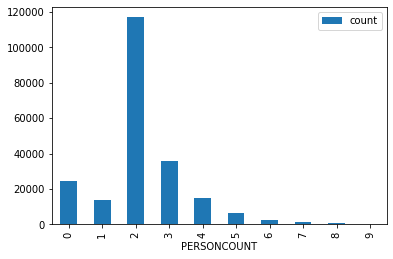

In [10]:
perdf = df[df.PERSONCOUNT < 10]
pergdf = perdf.groupby(perdf.PERSONCOUNT).size().to_frame('count')
pergdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x12cff6950>,
 'caps': [<matplotlib.lines.Line2D at 0x12d269450>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d279490>],
 'medians': [<matplotlib.lines.Line2D at 0x12d269f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d26c490>],
 'means': []}

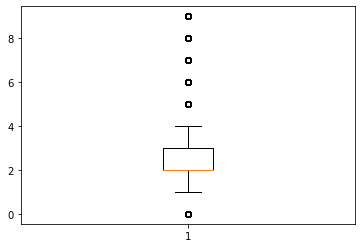

In [11]:
plt.boxplot(perdf.PERSONCOUNT)

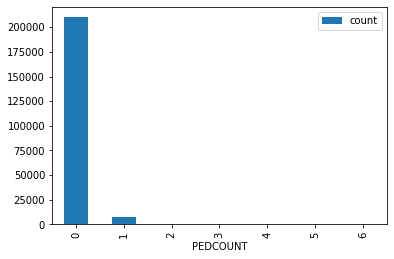

In [12]:
pedgdf = df.groupby(df.PEDCOUNT).size().to_frame('count')
pedgdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x1318824d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1318810d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x131894d50>],
 'medians': [<matplotlib.lines.Line2D at 0x12da43050>],
 'fliers': [<matplotlib.lines.Line2D at 0x12da43510>],
 'means': []}

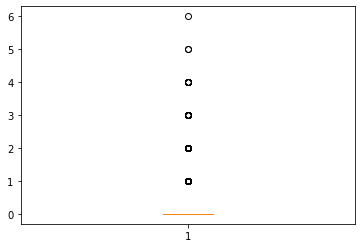

In [13]:
plt.boxplot(df.PEDCOUNT)

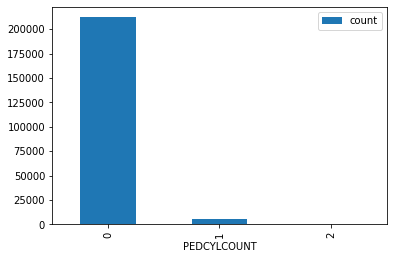

In [14]:
pedclgdf = df.groupby(df.PEDCYLCOUNT).size().to_frame('count')
pedclgdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x13199bb10>,
 'caps': [<matplotlib.lines.Line2D at 0x1309f4250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1309faa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1309f47d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1309e9250>],
 'means': []}

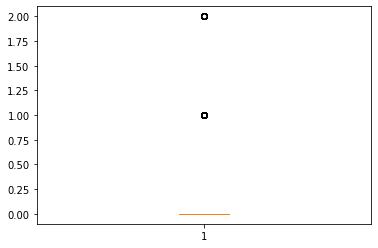

In [15]:
plt.boxplot(df.PEDCYLCOUNT)

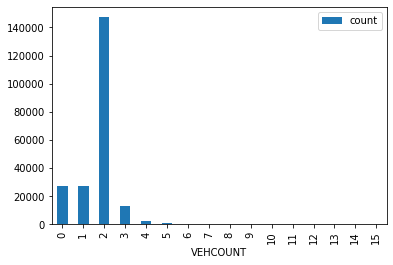

In [16]:
vehgdf = df.groupby(df.VEHCOUNT).size().to_frame('count')
vehgdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x12e1e1d90>,
 'caps': [<matplotlib.lines.Line2D at 0x12ca38190>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ca33e10>],
 'medians': [<matplotlib.lines.Line2D at 0x12ca23090>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ca230d0>],
 'means': []}

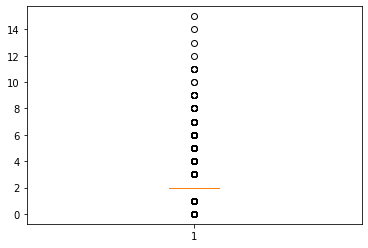

In [17]:
plt.boxplot(df.VEHCOUNT)

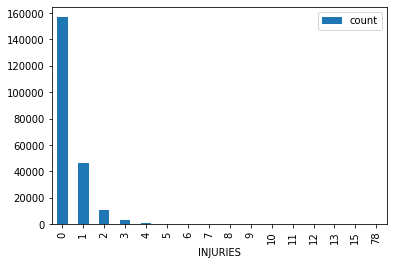

In [18]:
gdf = df.groupby(df.INJURIES).size().to_frame('count')
gdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x1294d7ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x12979d7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12979d490>],
 'medians': [<matplotlib.lines.Line2D at 0x1297a3210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1297a3750>],
 'means': []}

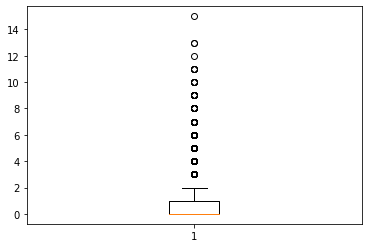

In [19]:
injdf = df[df.INJURIES < 70]
plt.boxplot(injdf.INJURIES)

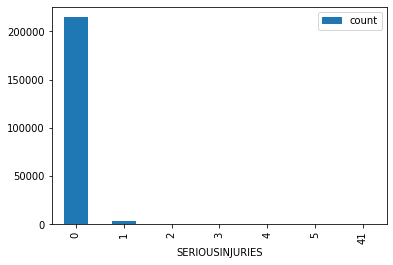

In [20]:
sidf = df.groupby(df.SERIOUSINJURIES).size().to_frame('count')
sidf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x12e9cdd50>,
 'caps': [<matplotlib.lines.Line2D at 0x12984aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1294c2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1319c9310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1297be510>],
 'means': []}

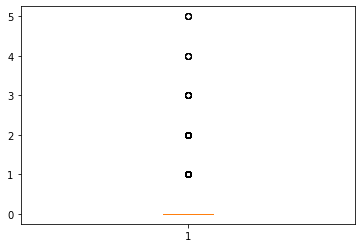

In [21]:
sinjdf = df[df.SERIOUSINJURIES < 40]
plt.boxplot(sinjdf.SERIOUSINJURIES)

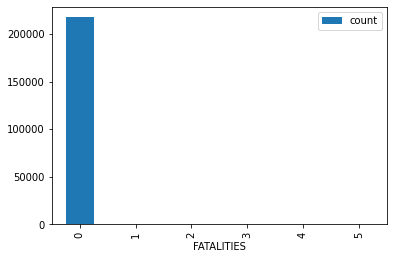

In [22]:
fdf = df.groupby(df.FATALITIES).size().to_frame('count')
fdf.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x12a1e8710>,
 'caps': [<matplotlib.lines.Line2D at 0x12a28f310>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a287b50>],
 'medians': [<matplotlib.lines.Line2D at 0x12a28f890>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a297310>],
 'means': []}

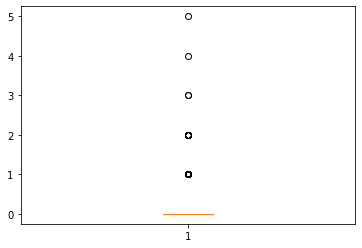

In [23]:
plt.boxplot(df.FATALITIES)

## d. General trend in the overall number of accidents (line graph)

In [24]:
df['year'] = pd.DatetimeIndex(df.INCDTTM).year

In [25]:
yeardf = df.groupby('year').year.size().to_frame('INCKEY').reset_index()
yeardf = yeardf[yeardf.INCKEY > 1]
#I dropped year 2003 which only had 1 incident in the dataset
yeardf.head(20)

,year,INCKEY
1,2004,15457
2,2005,16016
3,2006,15794
4,2007,15082
5,2008,14139
6,2009,13275
7,2010,11958
8,2011,12416
9,2012,12732
10,2013,12757


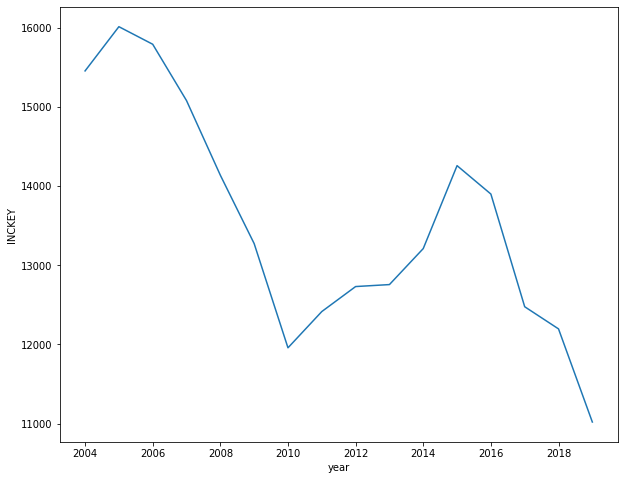

In [26]:
yeardf = yeardf[(yeardf['year'] < 2020)]
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x="year", y="INCKEY", data=yeardf)


## e. Trend for the top 5 locations with highest number of accidents (line graphs)

# Which locations have had high numbers of incidents?

In [27]:
locdf = df.groupby('LOCATION').size().to_frame('INCKEY').reset_index()
locdf.sort_values('INCKEY', ascending=False, inplace=True)
locdf = locdf.head(7)

In [28]:
locdf

,LOCATION,INCKEY
11241,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,298
17512,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,294
11242,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,291
11075,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,278
9543,6TH AVE AND JAMES ST,270
11079,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,264
10774,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,256


# How has the number of incidents changed over time for each location (7 locations with highest numbers of collisions)

In [29]:
locations = list(locdf.LOCATION)
locations

['BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 '6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP']

In [30]:
locyrdf = df[df.LOCATION.isin(locations)]
locyrdf.head()
#odf = odf[odf.Neighborhood.isin(neighborhoods)]

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year
153,-122.344896,47.717173,2154,328194,329694,3854704,Unmatched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,1,Property Damage Only Collision,NaN,3,0,0,0,0,0,0,2020-01-22T00:00:00.000Z,2020-01-22 00:00:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,2020
210,-122.328079,47.604161,2211,328042,329542,E985095,Matched,Intersection,29973.0,6TH AVE AND JAMES ST,,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2019-10-05T00:00:00.000Z,2019-10-05 14:38:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear or Partly Cloudy,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N,2019
281,-122.344896,47.717173,2282,329079,330579,3836287,Unmatched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,2b,Serious Injury Collision,NaN,3,0,0,0,1,0,0,2020-02-19T00:00:00.000Z,2020-02-19 00:00:00,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,2020
333,-122.328079,47.604161,2334,327880,329380,3851909,Unmatched,Intersection,29973.0,6TH AVE AND JAMES ST,,NaN,2,Injury Collision,NaN,3,0,0,0,2,0,0,2020-01-16T00:00:00.000Z,2020-01-16 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,2020
572,-122.328079,47.604161,2573,27100,27100,04291046,Unmatched,Intersection,29973.0,6TH AVE AND JAMES ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004-10-17T00:00:00.000Z,2004-10-17 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4291046.0,NaN,NaN,NaN,0,0,N,2004


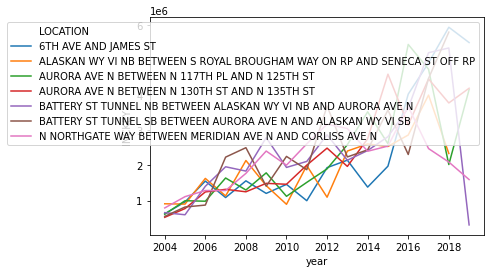

In [31]:
total_location_year_data = locyrdf.groupby(['LOCATION', 'year'])['INCKEY'].sum().reset_index()
total_location_year_data = total_location_year_data[(total_location_year_data['year'] < 2020)]
sns.lineplot(x="year", y="INCKEY", hue="LOCATION", data=total_location_year_data)


# Which locations have the highest numbers of fatal and serious injuries?

In [32]:
# Re-labeling serverity
df['SEVERITYCODE'] = df['SEVERITYCODE'].map({'0': 'Unknown', '1': 'Prop_damage', '2': 'Injury', '2b': 'Serious_injury', '3': 'Fatality'})

In [33]:
df.groupby(['SEVERITYCODE']).size().to_frame('count')

,count
SEVERITYCODE,
Fatality,341
Injury,57756
Prop_damage,135545
Serious_injury,3029
Unknown,21239


In [34]:
severity = ['Fatality', 'Serious_injury', 'Injury']
sevdf = df[(df['SEVERITYCODE'].isin(severity))]
sevcdf = sevdf.groupby('LOCATION').size().to_frame('INCKEY').reset_index()
sevcdf.sort_values('INCKEY', ascending=False, inplace=True)
most_sev = sevcdf.head(7)
most_sev

,LOCATION,INCKEY
5631,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,124
4697,6TH AVE AND JAMES ST,111
9263,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,96
10378,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,96
5635,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,94
5764,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,93
5763,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,81


In [53]:
mostsevlocations = list(most_sev.LOCATION)
mostsevlocations

['AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 '6TH AVE AND JAMES ST',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N']

Note: Locations that have the highest numbers of incidents and locations that have more severe incidetns don't overlap a lot

In [35]:
sevcdf.shape

(12720, 2)

In [36]:
sevcdf.INCKEY.sum()

60845

Note: sevcdf contains 12,720 rows (=locations) but 60,845 incidents. 

## 8.2 Categorial columns

## f. Look at frequencies

### External factors

In [37]:
df.groupby('LIGHTCOND').size().to_frame('OBJECTID').reset_index()

,LIGHTCOND,OBJECTID
0,Dark - No Street Lights,1535
1,Dark - Street Lights Off,1222
2,Dark - Street Lights On,48891
3,Dawn,2531
4,Daylight,117060
5,Dusk,5956
6,Other,236
7,Unknown,13451


In [38]:
df.groupby('WEATHER').size().to_frame('OBJECTID').reset_index()

,WEATHER,OBJECTID
0,Blowing Sand or Dirt or Snow,56
1,Clear or Partly Cloudy,112498
2,Fog/Smog/Smoke,574
3,Other,807
4,Overcast,27740
5,Raining,33153
6,Severe Crosswind,26
7,Sleet/Hail/Freezing Rain,110
8,Snowing,900
9,Unknown,15113


## People factors

In [39]:
people_factors = ['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING']
for factor in people_factors:
  display(Markdown(f"### {factor}"))
  display(df.groupby(factor).size().to_frame('OBJECTID').reset_index())

### INATTENTIONIND

,INATTENTIONIND,OBJECTID
0,Y,30041


### UNDERINFL

,UNDERINFL,OBJECTID
0,0,81685
1,1,4231
2,N,99905
3,Y,5352


### PEDROWNOTGRNT

,PEDROWNOTGRNT,OBJECTID
0,Y,5085


### SPEEDING

,SPEEDING,OBJECTID
0,Y,9677


## Characteristics of the collision site

In [40]:
site_characteristics = ['ADDRTYPE', 'JUNCTIONTYPE', 'ROADCOND']
for characteristics in site_characteristics:
  display(Markdown(f"### {characteristics}"))
  display(df.groupby(characteristics).size().to_frame('OBJECTID').reset_index())

### ADDRTYPE

,ADDRTYPE,OBJECTID
0,Alley,856
1,Block,142758
2,Intersection,70621


### JUNCTIONTYPE

,JUNCTIONTYPE,OBJECTID
0,At Intersection (but not related to intersection),2492
1,At Intersection (intersection related),67919
2,Driveway Junction,11363
3,Mid-Block (but intersection related),24252
4,Mid-Block (not related to intersection),99639
5,Ramp Junction,190
6,Unknown,19


### ROADCOND

,ROADCOND,OBJECTID
0,Dry,125989
1,Ice,1215
2,Oil,64
3,Other,131
4,Sand/Mud/Dirt,75
5,Snow/Slush,1005
6,Standing Water,116
7,Unknown,15038
8,Wet,47415


## g. Handling missing categories

## 9. Understand relations between columns

## a. Scatter plots

Is there a correlation between the total number of incidents and number of severe incidents?

In [51]:
# Trying to see these locations' total # of incidents and # of severe incidents by merging two dataframes
sev_num = pd.merge(locdf, sevcdf, left_on = 'LOCATION', right_on = 'LOCATION')
sev_num.rename(columns = {'INCKEY_x': 'Total_incidents', 'INCKEY_y': 'Severe_incidents'}, inplace=True)
sev_num.head(10)

,LOCATION,Total_incidents,Severe_incidents
0,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,298,81
1,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,294,96
2,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,291,93
3,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,278,124
4,6TH AVE AND JAMES ST,270,111
5,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,264,94
6,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,256,68


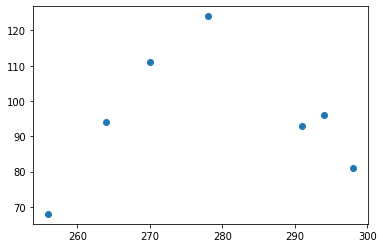

In [52]:
# I have to redo this plot because I selected top 7 locations in sev_num, so it's not much of a scatter plot anymore
plt.scatter(x=sev_num['Total_incidents'], y=sev_num['Severe_incidents'])
plt.show()

## b. Bar graphs

## Incidents by type of location

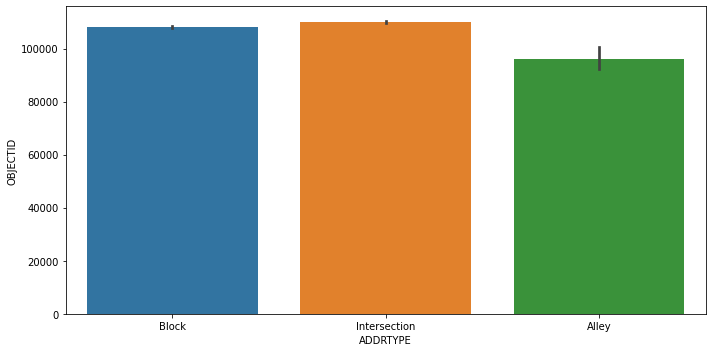

In [42]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data= df, x= 'ADDRTYPE', y= 'OBJECTID')

plt.tight_layout()

## Incidents by type of collision

In [43]:
colldf = df.groupby('COLLISIONTYPE').size().to_frame('OBJECTID').reset_index()
colldf.head()

,COLLISIONTYPE,OBJECTID
0,Angles,34664
1,Cycles,5802
2,Head On,2122
3,Left Turn,13837
4,Other,24027


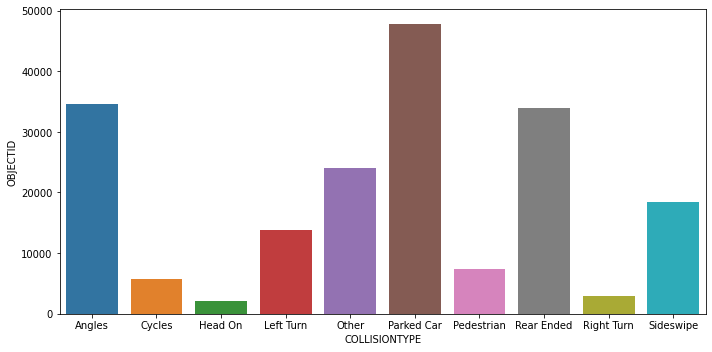

In [44]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data= colldf, x= 'COLLISIONTYPE', y= 'OBJECTID')

plt.tight_layout()

## Incidents by severity

In [45]:
scdf = df.groupby('SEVERITYCODE').size().to_frame('OBJECTID').reset_index()
scdf.head()

,SEVERITYCODE,OBJECTID
0,Fatality,341
1,Injury,57756
2,Prop_damage,135545
3,Serious_injury,3029
4,Unknown,21239


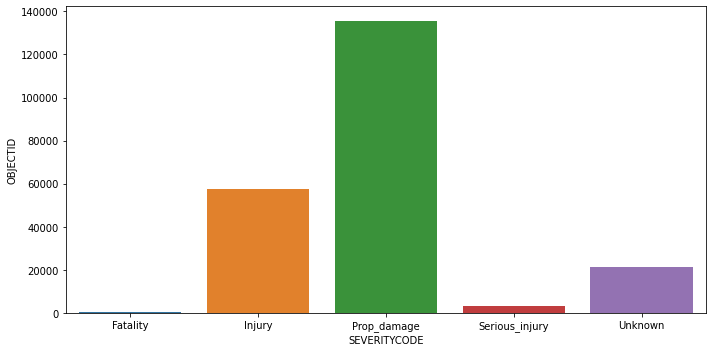

In [46]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data= scdf, x= 'SEVERITYCODE', y= 'OBJECTID')

plt.tight_layout()

Note: SEVERITYCODE and SEVERITYDESC have the same information


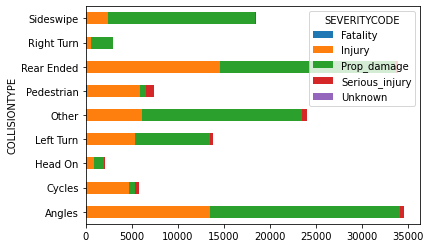

In [47]:
pivdf = df[(df['COLLISIONTYPE'] !='Parked Car')]
pivdf.pivot_table(index='COLLISIONTYPE', columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

## Severity by type of collision

In [48]:
type_severity = df.groupby(['COLLISIONTYPE', 'SEVERITYCODE'])['INCKEY'].count().reset_index()
type_severity_pivot = type_severity.pivot(
    columns = 'SEVERITYCODE',
    index = 'COLLISIONTYPE',
    values = 'INCKEY').reset_index()
type_severity_pivot

SEVERITYCODE,COLLISIONTYPE,Fatality,Injury,Prop_damage,Serious_injury,Unknown
0,Angles,24.0,13453.0,20754.0,432.0,1.0
1,Cycles,25.0,4695.0,667.0,415.0,NaN
2,Head On,20.0,862.0,1139.0,101.0,NaN
3,Left Turn,16.0,5346.0,8207.0,268.0,NaN
4,Other,91.0,6047.0,17400.0,489.0,NaN
5,Parked Car,7.0,2629.0,45054.0,125.0,NaN
6,Pedestrian,125.0,5839.0,658.0,834.0,NaN
7,Rear Ended,11.0,14564.0,19202.0,222.0,NaN
8,Right Turn,1.0,602.0,2327.0,20.0,NaN
9,Sideswipe,10.0,2474.0,15926.0,71.0,NaN


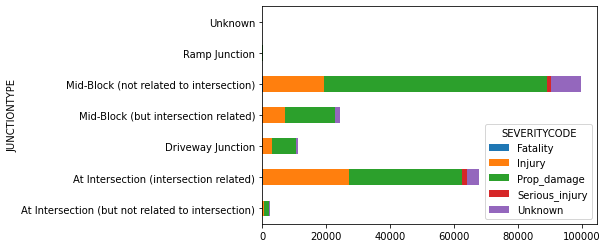

In [49]:
df.pivot_table(index='JUNCTIONTYPE', columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

# Notes

In [50]:
status = list(df['STATUS'].unique())
status

['Unmatched', 'Matched']

Note: Not sure what 'matched' means. Not in the dictionary.

In [51]:
df.ST_COLCODE.unique()

array([' ', nan, '13', '71', '32', '10', '14', '11', '23', '12', '45',
       '28', '52', '6', '0', '50', '20', '15', '51', '74', '16', '81',
       '2', '3', '26', '1', '40', '22', '19', '24', '30', '29', '25', '4',
       '5', '21', '57', '72', '83', '53', '66', '56', '27', '41', '73',
       '8', '17', '65', '82', '49', '67', '84', '31', '43', '42', '64',
       '48', '54', '60', '87', '7', '85', '88', '18'], dtype=object)

In [52]:
df.ST_COLDESC.unique()

array([nan,
       'From same direction - both going straight - both moving - rear-end',
       'Same direction -- both turning right -- both moving -- sideswipe',
       'One parked--one moving', 'Entering at angle',
       'From same direction - both going straight - one stopped - rear-end',
       'From same direction - both going straight - both moving - sideswipe',
       'From same direction - all others',
       'From same direction - both going straight - one stopped - sideswipe',
       'Vehicle - Pedalcyclist',
       'From opposite direction - one left turn - one straight',
       'Vehicle overturned', 'Pedalcyclist Strikes Moving Vehicle',
       'Vehicle going straight hits pedestrian', 'Fixed object',
       'One car leaving parked position',
       'From same direction - one left turn - one straight',
       'Other object',
       'Same direction -- both turning right -- one stopped -- rear end',
       'From same direction - one right turn - one straight',
       'Same 